# Analiza letalskih nesreč od leta 1908 do 2009

## Uvod

Letalski promet se je pojavil v začetku 20. stoletja. Od takrat se se je število letov drastično povečevalo, prav tako so se dogajale tudi letalske nesreče. V naši analizi smo želeli analizirati, koliko letalskih nesreč se je zgodilo skozi čas ter njihove razloge. V naši analizi smo obravnavali podatke letalskih nesreč od leta 1908 do 2009.

## Problem

Našo analizo letalskih nesreč smo poskušali razdeliti na dva dela. V 1. delu smo se ukvarjali predvsem s splošnimi statistikami:

- št. nesreč skozi leta
- št. mrtvih
- št. potnikov
- najbolj uspešna ter najmanj uspešna letalska podjetja
- ...


V drugem delu analize pa smo poskušali odkriti, kje so se najpogosteje dogajale nesreče ter razlog zakaj je prišlo do same nesreče.

## Podatki

Podatki so pridobljeni na strani [https://www.kaggle.com/datasets/saurograndi/airplane-crashes-since-1908](https://www.kaggle.com/datasets/saurograndi/airplane-crashes-since-1908).

Nahajajo se v [podatki/Airplane_Crashes_and_Fatalities_Since_1908.csv](podatki/aeroflot_accidents_1970s.csv). Za podane podatke smo se odločili, ker so že urejeni ter normalizirani. Na večino ostalih spletnih straneh podatki niso bili urejeni ter so bili predvsem pomankljivi. Podatki so v obliki .csv datoteke. Podatki vsebujejo  13 atributov.

- Date (datum nesreče)
- Time (točen čas nesreče)
- Location (lokacija nesreče)
- Operator (podjetje, ki si lasti to letalo)
- Flight (številka leta)
- Route (pot iz kje do kam)
- Type (model letala)
- Registration (registerska številka letala)
- cn_ln (številka konstrukcije ali serijska številka / številka linije ali trupa)
- Aboard (število posadke)
- Fatalities (število mrtvih)
- Ground (št. umrlih ob trčenju v tla)
- Summary (Opis vzroka nesreče)

Izmed podanih atributov smo se osredotočali predvsem na slednje atribute: Date, Location, Operator, Type, Aboard, Fatalities ter Summary. Določenim atributom včasih manjka vrednost. V našem primeru smo se fokusirali na vse vrstice podatkov, saj določene mankajoče vrednosti niso konkretno vplivale na analizo podatkov (imamo dovolj velik vzorec podatkov).

In [10]:
from Classes import Data
import pandas as pd
data = Data()
from IPython.display import display
display(pd.DataFrame(data.podatki).head(5))

,Date,Time,Location,Operator,Flight,Route,Type,Registration,cn_In,Aboard,Fatalities,Ground,Summary
0,01/01/1966,,"Near Palembang, Sumarta, Indonesia",Garuda Indonesia Airlines / Garuda Indonesia ...,,,Douglas DC-3 / Douglas DC-3,PK-GDU/PK-GDE,13463 / 19719,34,34,0,Midair collision between two Garuda aircraft. ...
1,01/01/1970,00:30,"Nulato, Alaska",Galena Air Service - Air Taxi,,"Nulato, AK - Tanana, AK",Cessna 180,N3472Y,,4,2,0,Emergency flight to airlift sick patient. Coll...
2,01/01/1974,12:38,"Near Turin, Italy",Itavia,,Bologna - Torino,Fokker F-28 Fellowship 1000,I-TIDE,11015,42,38,0,Crashed 2 miles short of the runway during an ...
3,01/01/1976,05:30,"Near Al Qaysumah, Saudi Arabia",Middle East Airlines,438,Beirut - Dubai,Boeing B-720B-023B,OD-AFT,18020/165,82,82,0,The aircraft broke-up at FL 370 and crashed in...
4,01/01/1978,20:15,"Off Bandra, Maharashtra, India",Air India,855,Bombay - Dubai,Boeing B-747-237B,VT-EBD,19959/124,213,213,0,"Following a right turn, after taking off, the ..."


Uporabili smo tudi podatke iz [aeroflot_accidents.csv](podatki/aeroflot_accidents_1970s.csv).
Podatke smo pridobli z ekstrakcijo podatkov iz spletne strani iz [https://en.wikipedia.org/wiki/Aeroflot_accidents_and_incidents_in_the_1970s](https://en.wikipedia.org/wiki/Aeroflot_accidents_and_incidents_in_the_1970s). Z ekstrakcijo podatkov ni bilo veliko težav. Pridobljeni podatki so bili že v prvotni obliki zapisani v obliki HTML tabele. Posledično ni bilo velike potrebe po filtraciji podatkov, saj so že bili v normalizirani obliki. Atributi so si precej podobni z prvotno podatkovno zbirko. Tudi tukaj smo se fokusirali predvsem na atributa Fatalities  (smrtnih žrtev) ter Description (opis vzroka nesreče). Za ekstrakcijo podatkov smo uporabili Python ter ogrodje Selenium, ki omogoča ekstrahiranje podatkov po HTML atributih, razredih, id-jih...

In [11]:
display(pd.DataFrame(data.aeroflot_podatki).head(5))

,Date,Location,Aircraft,Tail number,Airline division,Aircraft damage,Fatalities,Description,Refs
0,1 April 19,Toguchina,An-24B,CCCP-47751,West Siberia,W/O,45/45,The aircraft crashed 20 kilometres (12 mi) sou...,[14]
1,1 December,Saratov,An-24B,CCCP-46788,Privolzhsk,W/O,57/57,During the descent to Saratov the aircraft fle...,[80]
2,1 February,Krasny,An-2TP,CCCP-40570,Central,W/O,Unknown,"Collided with another An-2TP, tail number CCCP...",[362]
3,1 June 197,Bioko Island,Tu-154A,CCCP-85102,International,W/O,45/45,Crashed while en route its first leg into a 75...,[40][289]
4,1 June 197,Bogodorsk Island,An-24B,CCCP-47729,East Siberia,W/O,0,Crashed near Ulan-Ude while on a training flig...,[58]


## Analiza

### št. nesreč letal skozi leta

Začeli smo s preprosto statistično analizo - Računanje št. nesreč letal skozi leta. Narisali smo 2 grafa, ki si ju lahko ogledate v datoteki [nesrece_skozi_leta.ipynb](notebooks/nesrece_skozi_leta.ipynb), spodaj pa sta prikazana skupaj. Iz grafov smo opazili dokaj stabilno rast nesreč od leta 1908 do 2009. Zasledili smo naslednja prelomna leta z velikim porastom nesreč:

- 1917-1920 (1. svetovna vojna, porast tehnoloških napredkov ter letalske industrije)
- 1942-1947 (2. svetovna vojna, ponovni porast tehnoloških napredkov, sestreljevanje vojaških ter potniških letal).
- 1950-1970 (povojno obdobje, št. nesreč se v povprečju zniža, razmah komercialnega letalstva)
- 1970 - 1990 (hladna vojna, veliko letalskih nesreč na ozemlju Sovjetske zveze)
- 1990 - 2009 (razvoj najmoderejših sistemov za krmiljenje letal, stopnja nesreč se začne zmanjševati)


**Ugotovitve**

Porast letalske industrije se je začel v času 1. svetovne vojne. Tudi v preostalih časovnih obdobjih so vojne zelo vplivale na razmah letalske industrije ter posledično tudi na število samih nesreč. Iz grafov ni razvidnih konkretnih razlogov za manjše poraste ali padce število nesreč razen zgodovinskih dogodkov ki so se zgodili v tem času ter porast število letov zaradi porast komercialnih letov


### Razmerje št. nesreč/št. vseh potnikov

Ugotavljali smo kako se razmerje število nesreč v razmerju z število potnikov spreminja čez leta. Iz grafov smo ugotovili da pride do zelo velikega porasta v letu 1917/1918. Sklepamo da je to anomalija v podatkovni zbirki zaradi 1. svetovne vojne. Razmerje po hitrem vzponu zelo hitro pade in se z leti normalizira na okrog 5%. Črta ki prikazuje razmerje je oranžne barve, rdeča barva pa število nesreč skozi leta. 

Kaj to pomeni?

Pomeni da se čez leta zgodi vse več nesreč(več letov na leto -> proporcionalno več nesreč), prevoženih potnikov pa je vsako leto znatno več.

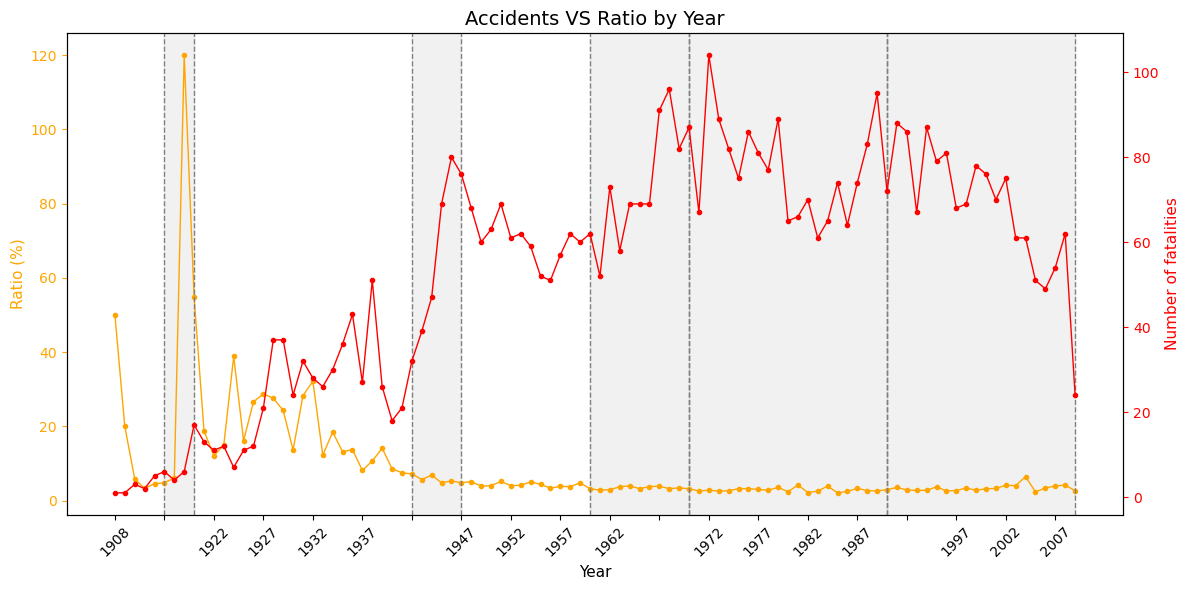

In [12]:
data.fatalities_vs_ratio()

### Potniki in smrtne žrtve

V analizi smo ugotavljali tudi razmerje mrtvih/preživelih skozi čas. Poskušali smo narisati graf, ki je najbolj nazorno prikazoval razmerje. Iz grafa se lepo vidi da se v obdobju 1908-1945 skoraj vse nesreče skoraj 100% fatalne. Procent umrlih potnikov se drastično zmanjša po drugi svetovni vojni. Dejstvo je da so po 2. svetovni vojni v podatkovni zbirki navedeni podatki tudi o komercialnih letih. Imajo boljše varnostne sisteme, posledično sklepamo da ni njihov vzrok nesreče vojaška sestrelitev ampak okvara motorja, ptice, problem ob vzletu...nekaj več o tem v nadaljevanju.

Iz celotne podatkovne zbirke smo ekstrahirali podatek o tem, da je od vseh 


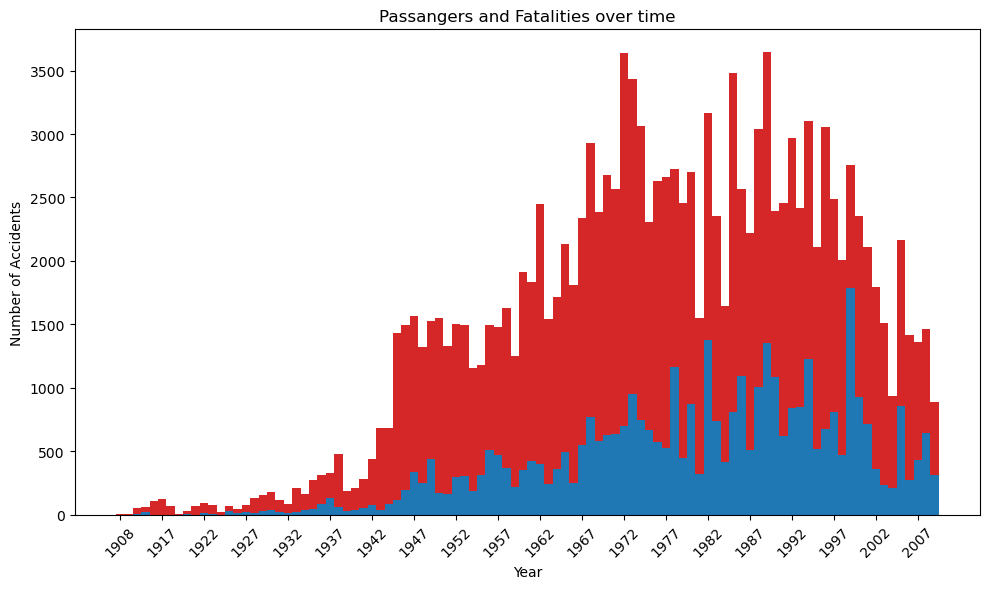

In [13]:
data.passanger_and_fatalities_over_time()

### Letala z največ nesrečami

Letalo z največ nesrečami je Douglas DC-3 z preko 300 nesrečami. Ta podatek nam ne pove veliko o tem ali je to veliko, malo ter v kakšnem razmerju je z preostalimi modeli letal. V analizi smo si narisali stolpični diagram 10-ih letal z največ nesrečami. Douglas je konkretno izstopal. Večina preostalih letal je imelo bistveno manj nesreč, številka se giblje pod 100 nesreč. Zakaj je temu tako? Po izčrpnem preiskovanju smo ugotovili, da je Douglas DC-3 vojaško letalo, ki se ga je v določenem časovnem obdobju uporabljalo tudi kot potniško letalo. Poleg tega model DC-3 zajema svoje pod različice ali verzije. Npr. model letala Douglas C-47 Skytrain spada pod označbo DC-3. Pod ta model spadajo različice tudi z imeni  C-48, C-49, C-50, C-51, C-52, C-53 Skytrooper, C-68, C-84, C-117 Super Dakota. To je tudi eden od razlogov za visoko število letalskih nesreč.

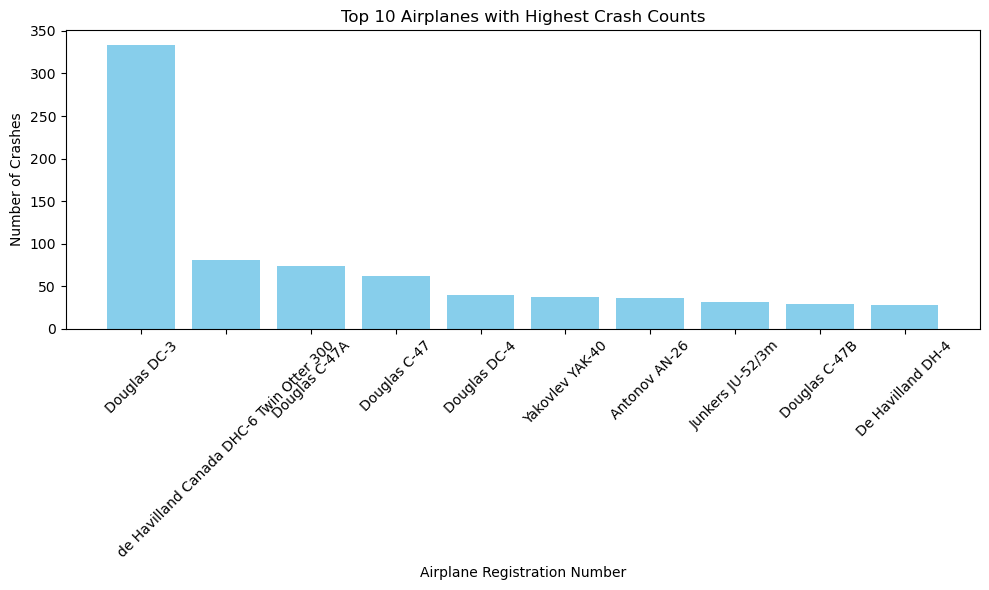

In [14]:
data.highest_crash_counts()

### Napadi na letala
Bolj kot se spuščamo v podrobno obravnavo podatkovne zbirke, bolj opažamo da so imele vojne velik vpliv na letalsko industrijo, posledično tudi z letalskimi nesrečami. Zbirka vsebuje atribut opis nesreče. Iz opisov smo izluščili nekatere pogoste besede, ki bi lahko klasificirale nesrečo pod "vojaško" oziroma "napad" na letalo.
Poskusili smo s slednjimi besedami:
**shoot**,**shot**,**attack**,**overshoot**,**undershoot**

Dobili smo pričakovane rezultate. Našli smo nesreče na naslednjih prelomnicah: 
- 1940-1945: 2. svetovna vojna
- 1965-1970 Vietnamska vojna
- 1985-1995 vojna v jugoslaviji, ostali vojaški konflikti v srednjem vzhodu

### Sistemske napake
Nesreče smo želeli kvalificirati tudi po ostalih zanimivih besedah, saj verjamemo da vojne niso edini povzročitelj letalskih nesreč.

Poskusili smo ugotoviti število nesreč zaradi sistemskih napak oziroma problematik v samem dizajnu letala.
Poskusili smo s slednjimi besedami:
**faulty design**, **design flaw**, **design deficiencies**

Število najdenih nesreč: 16

### Primankovanje goriva
Klasificirali smo po slednjih besedah:
**low fuel**, **fuel exhaustion**, **ran out of fuel**, **running out of fuel**

Število najdenih nesreč: 66

### Ptice
Klasificirali smo po slednjih besedah: **bird**,**geese**,**flock**

Število najdenih nesreč: 12

### Terorizem

Klasificirali smo po slednjih besedah: **terrorism**, **terrorist**

Število najdenih nesreč: 12

### Nesreče okrog vodnih površinah

Klasificirali smo po slednjih besedah: **ocean**,**water**,**swamp**,**sea**,**river**

Število najdenih nesreč: 617

### Vrsta poletov

Večkrat smo v analizi omenili, da se v podatkovni zbirki nahajajo poleti, ki so lahko vojaški ali komercialni. Proporcionalnost je sledeča: 14.8% je vojaških nesreč, preostalih 85.2% spada pod komercialne polete. Iz tega se vidi, da je precej več komercialnih nesreč. Graf obeh vrst poletov skozi čas smo tudi narisali. Iz grafa se je nazorno videlo da vojaške nesreče naredijo velik porast v času 1940-1945, nato pa se vzorec nesreč znatno zniža in pride do manjših nihanj, vse do leta 2009. Iz tega lahko pridemo do zaključka, da je večino vojaških nesreč prišlo v času 2. svetovne vojne. Ostale vojne(jugoslovanska, afganistanska, vietnamska) nimajo velikega vpliva. Velika verjetnost je tudi da veliko vojaški nesreč ni popisanih oziroma mankajo v obravnavani podatkovni zbirki. 

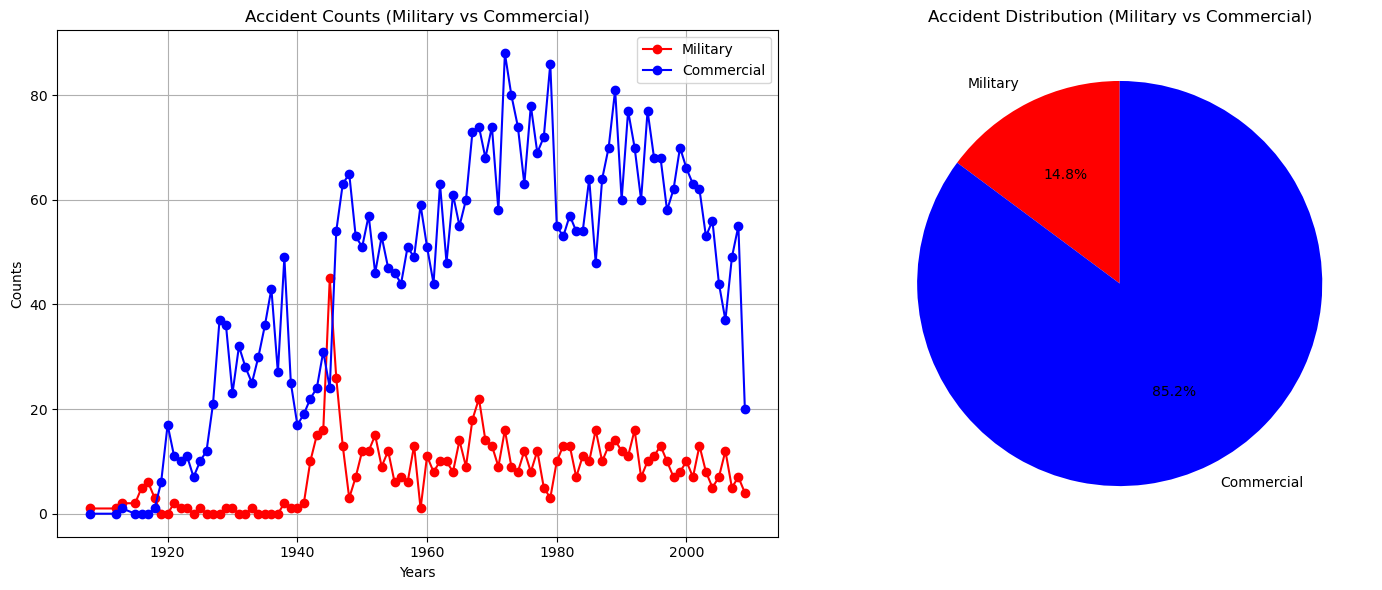

In [15]:
data.type_of_flights()

### Lokacija nesreč

Spodaj je prikazana animacija lokacij nesreč skozi čas po celotnem svetu. Za izvedbo animacije je bila potrebna uporabe knjižnice **PillowWriter**. Za prikaz preprostega zemljevida sveta smo uporabili knjižnico **cartopy**. Sama podatkovna zbirka ne vsebuje točnih kordinat nesreč. Vsebuje pa kraj oziroma približno lokacijo nesreče. S pomočjo Geocode reverse inženiringa smo lahko preko klicev na  [Nominatim API](https://nominatim.openstreetmap.org/ui/search.html) poiskali kordinate letalskih nesreč. Največ težav se je pojavilo pri ugotavljanju kordinat nesreč, ki so se zgodile na morju. Geocoding API je večkrat imel težave pri zaznavi samega kraja. Po natančnejši obravnavi smo se odločili da iz nizov odstranimo nepotrebne besede kot so: **Near**, **Off**, **Around**, **Close to**. Po čiščenju nizov je Geocoding API našel večino obmorskih krajev.

![SegmentLocal](world_map.gif "segment")

Lokacije nesreč smo narisali tudi v "wordcloud" oziroma besedni oblak. Bolj pogostejše države ter območja izstopajo s svojo velikostjo. Med njimi izstopajo predvsem Brazilija, Rusija, Aljaska ter Kanada. 

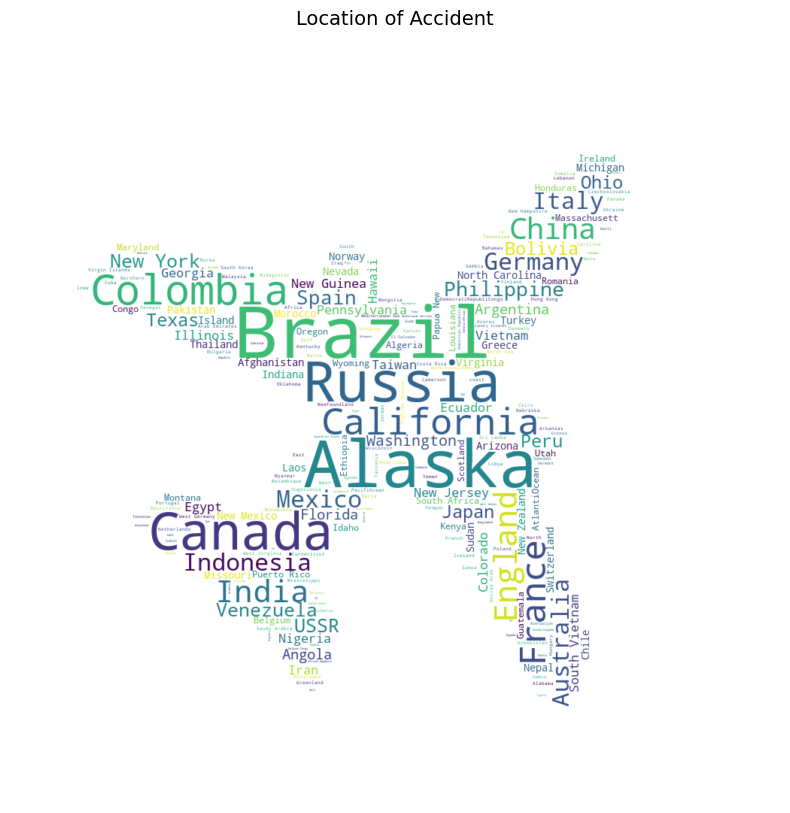

In [16]:
data.countrycloud('Location')

### Operatorji in lokacija

Zanimalo nas je kateri operator je imel največ nesreč. Ugotovitve so slednje:
- Aeroflot: 179
- Military - U.S. Air Force: 176
- Air France: 70

Zanimivo je da je največ nesreč bilo pri Ruskemu operatorju in sicer Aeroflot. V analizi smo si narisali graf vseh nesreč skozi leta. Opazili smo visoko število nesreč v času 1970-1990. O teh nesrečah je več informaciji na [https://www.wikipedia.org/](https://en.wikipedia.org/wiki/Aeroflot_accidents_and_incidents).


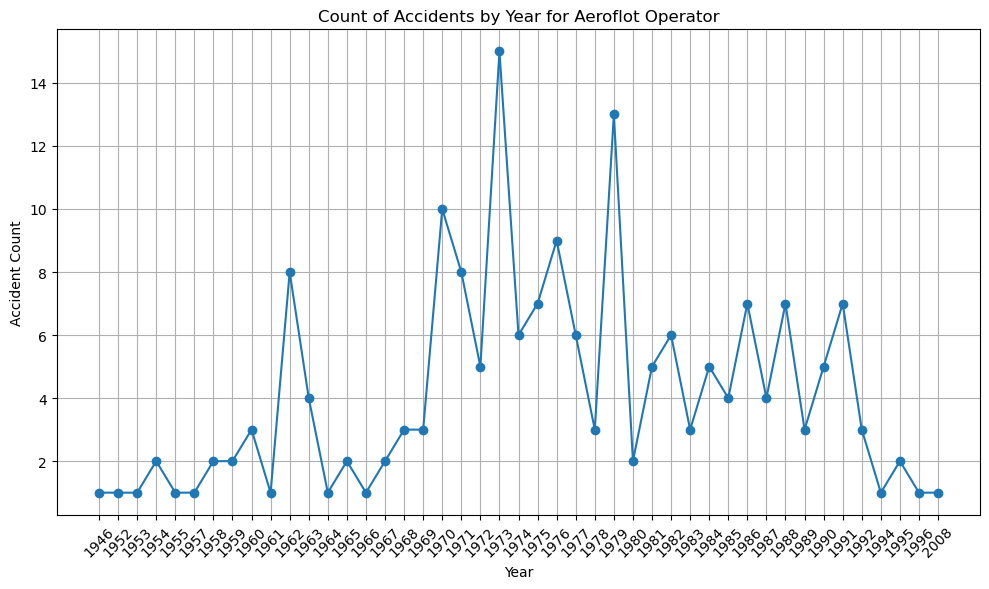

In [17]:
data.count_of_accidents_by_year_operator()


Podatke smo iz tabele o nesrečah ekstrahirali s pomočjo orodji Python ter Selenium. Ekstrakcija je bila preprosta. Podatki na spletni strani so že urejeni v obliki tabele. Podatke je bilo potrebno shraniti v Python slovar, to pa smo zapisali v .csv datoteko za trajno ohranitev podatkov ter nadalnjo obravnavo.

### Gručenje nesreč

Nesreče smo poskusili tudi gručiti glede na podoben/skupen opis nesreče. Pri tem smo naletali na kar nekaj težav. Veliko nesreč ima pomankljiv opis razloga nesreče. Poleg tega opis vsebuje veliko predlogov, veznikov ter ostalih jezikovnih konstruktov, ki slabo vpliva na clustering algoritem. Stvar smo reševali na tak način da smo poskušali opise nesreč čimbolj normalizirati. Odstranili smo večina veznikov, predlogov ter ostalih besed, ki ne napovedujejo vzroka nesreče. Rezultate smo razdelili v 3 gruče:

- Gruča 0: napaka z motorjem, mehanski problemi...

- Gruča 1: kolizija dveh letal, eksplozija bombe, zalet v goro...

- Gruča 2: slabi vremenski pogoji, kontakt z drevesom, disorientacija pilota...

To so osnovne gruče. Tudi po normalizaciji podatkov vidimo da ima algoritem težavo s tem kako grupirati nesreče. Glavni problem je premalo natančen opis, ki ne vsebuje ključnih besed/razlogov za strmoglavljenje letal.

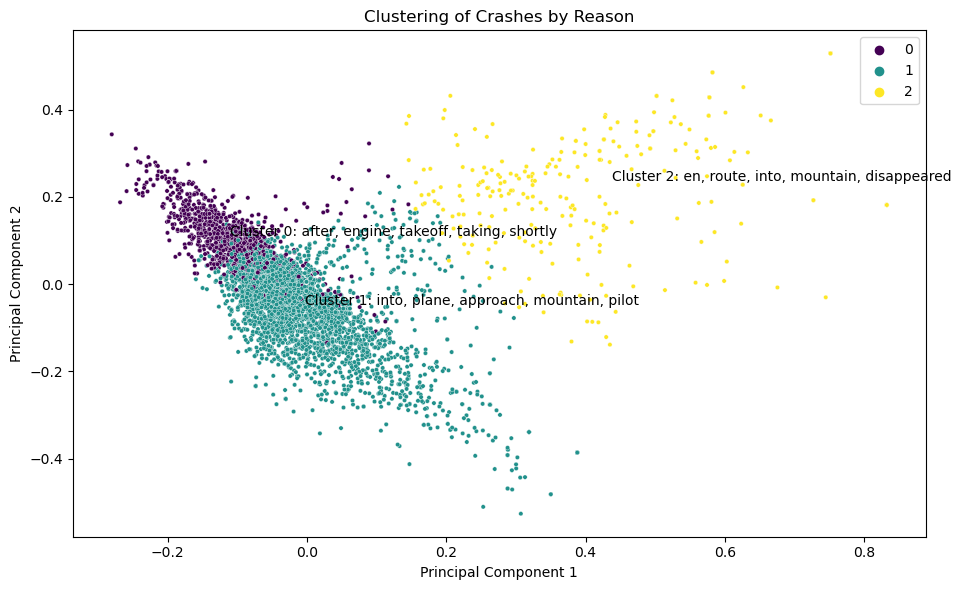

In [18]:
data.cluster_crashes_by_reason_vsi()